In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
train = pd.read_csv("final_df.csv")

In [5]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [6]:
X = pd.get_dummies(X)

## Check cross validation scores with different algorithms 

In [7]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [9]:
names = ['LR','KNN','NB','DT']
clfs =  [LogisticRegression(max_iter=200), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(max_depth=5)]

In [10]:
for clf,name in zip(clfs, names):
   scores = cross_val_score(clf,X_scaled,y,cv=3)
   print(scores)
   print(f"{name} = {scores.mean()*100:0.2f}")
   all_scores[name] = (scores.mean() * 100)

[0.80851064 0.79787234 0.80851064]
LR = 80.50
[0.7712766  0.74468085 0.7393617 ]
KNN = 75.18
[0.78723404 0.79787234 0.80851064]
NB = 79.79
[0.7393617  0.79787234 0.75      ]
DT = 76.24


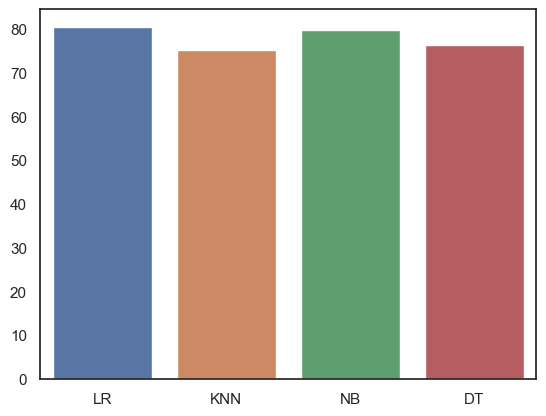

In [11]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
#ax = plt.set_xticklabels(labels = all_scores.keys())